--- Top Correlations with Diagnosis ---
Diagnosis              1.000000
UPDRS                  0.398006
Tremor                 0.274370
Rigidity               0.185611
Bradykinesia           0.184042
PosturalInstability    0.147519
Age                    0.065344
Depression             0.059080
Diabetes               0.057067
AlcoholConsumption     0.036699
Name: Diagnosis, dtype: float64

--- Top Negative Correlations (Protective Factors) ---
DietQuality            -0.022992
DiastolicBP            -0.029074
SleepQuality           -0.043295
MoCA                   -0.173104
FunctionalAssessment   -0.225036
Name: Diagnosis, dtype: float64


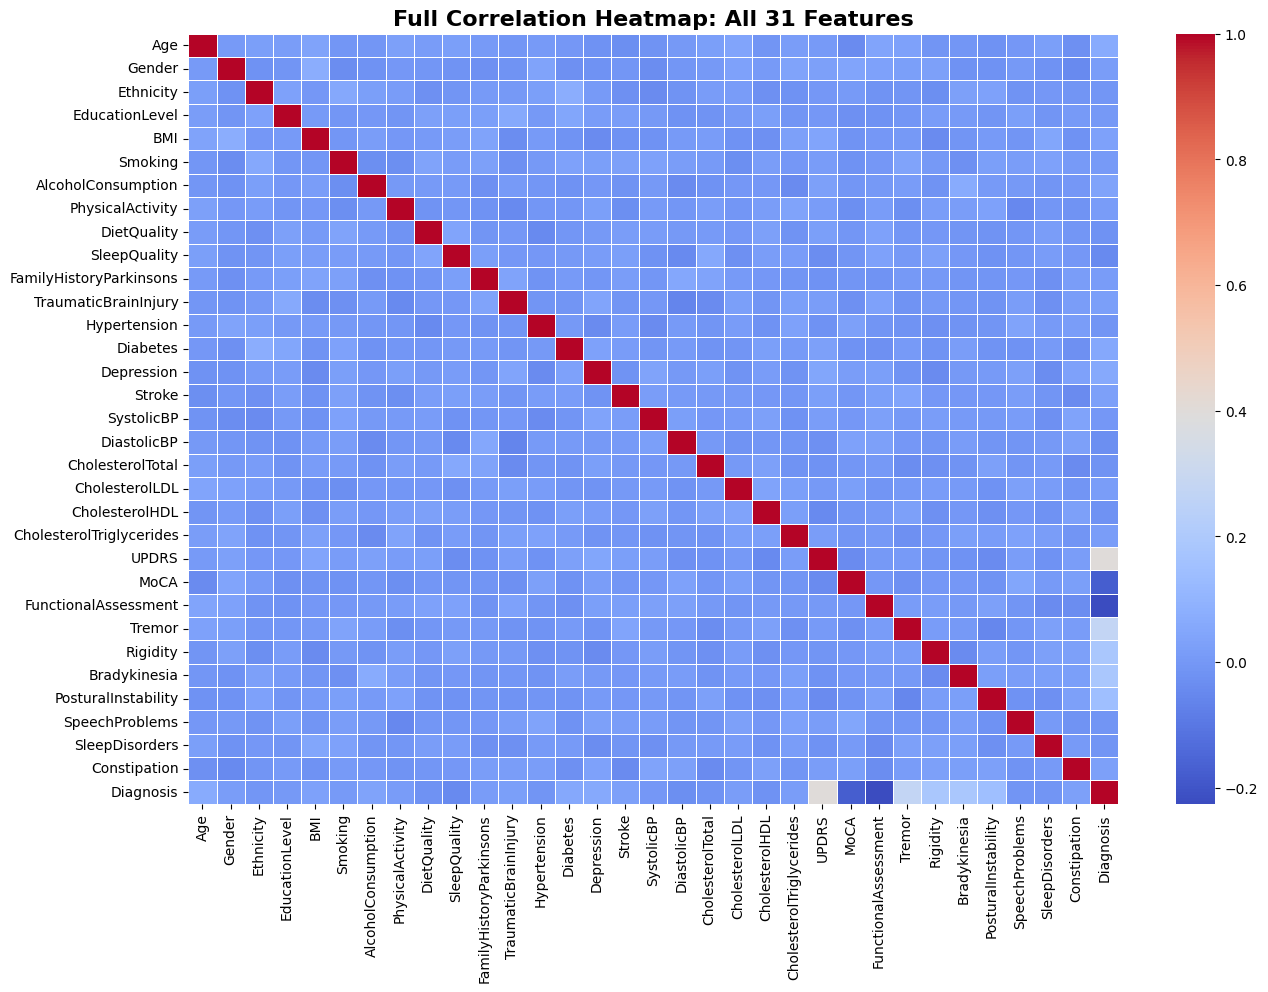

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
# Load the data and set PatientID as the index immediately
df = pd.read_csv('../data/parkinsons_cleaned.csv', index_col='PatientID')

#calculate correlations, PatientID will not be included
corr_matrix = df.corr()

# 2. Calculate the correlation matrix for ALL columns
# This shows how every variable relates to every other variable (-1 to 1)
corr_matrix = df.corr()

# 3. Focus: What correlates most with the Diagnosis?
print("--- Top Correlations with Diagnosis ---")
diagnosis_corr = corr_matrix['Diagnosis'].sort_values(ascending=False)
print(diagnosis_corr.head(10)) # Top 10 positive correlations
print("\n--- Top Negative Correlations (Protective Factors) ---")
print(diagnosis_corr.tail(5)) # Top 5 negative correlations

# 4. Visualization: Full Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Full Correlation Heatmap: All 31 Features', fontsize=16, fontweight='bold')
plt.show()

/tmp/ipykernel_361306/2888248553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  risk_plot = sns.barplot(x=top_risk_factors.values, y=top_risk_factors.index, palette='Reds_r')


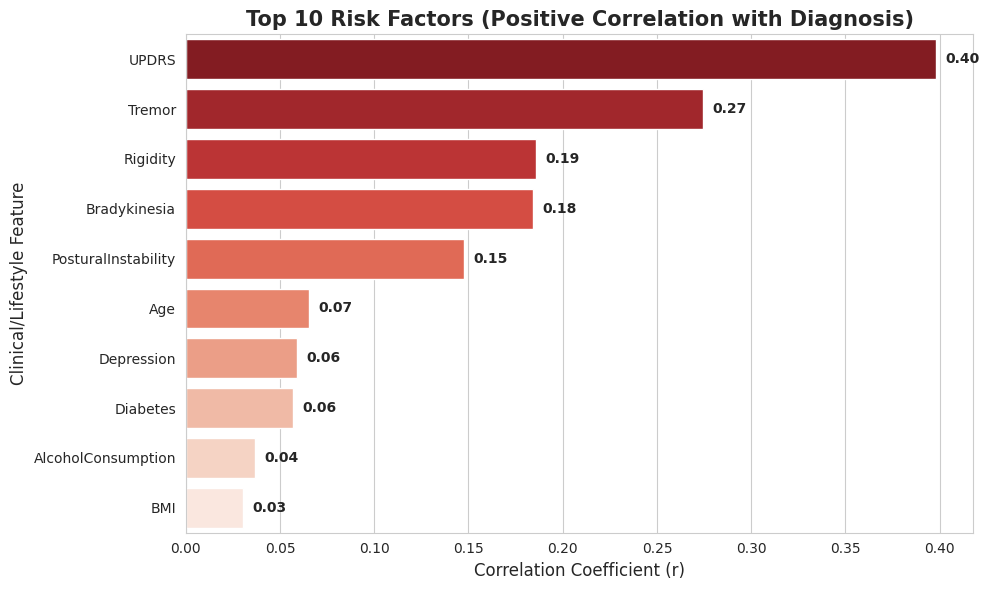

In [2]:
# Extract correlations specifically for Diagnosis
# We drop 'Diagnosis' itself to avoid a perfect 1.0 correlation with itself
risk_factors = corr_matrix['Diagnosis'][corr_matrix['Diagnosis'] > 0].drop('Diagnosis', errors='ignore')

# Sort and select the top 10 strongest risk factors (positive correlations)
top_risk_factors = risk_factors.sort_values(ascending=False).head(10)

# Visualization: Create a bar plot using a Red palette
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
risk_plot = sns.barplot(x=top_risk_factors.values, y=top_risk_factors.index, palette='Reds_r')

# Add titles and labels in English for the presentation
plt.title('Top 10 Risk Factors (Positive Correlation with Diagnosis)', fontsize=15, fontweight='bold')
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Clinical/Lifestyle Feature', fontsize=12)

# Annotate values on the bars for clarity
for i, val in enumerate(top_risk_factors.values):
    risk_plot.text(val + 0.005, i, f'{val:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipykernel_361306/586117492.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  protect_plot = sns.barplot(x=top_protective_factors.values, y=top_protective_factors.index, palette='Blues_r')


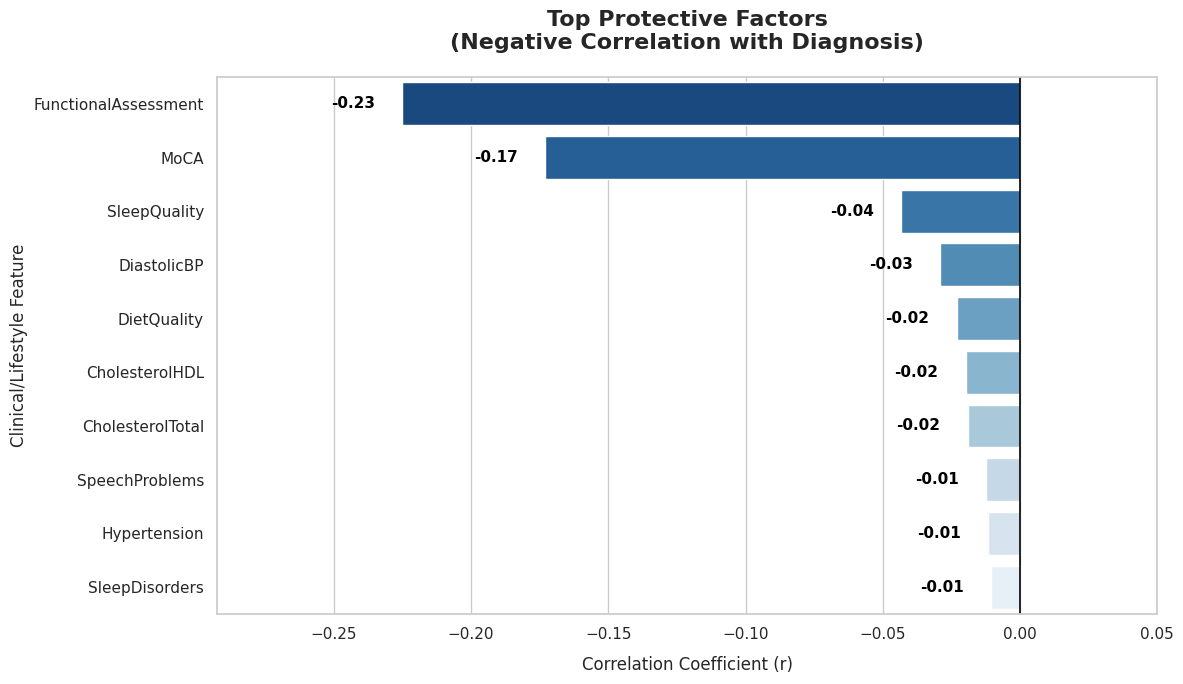

In [3]:

#Extract and filter negative correlations for Diagnosis
protective_factors = corr_matrix['Diagnosis'][corr_matrix['Diagnosis'] < 0]
top_protective_factors = protective_factors.sort_values(ascending=True).head(10)

#Visualization: Professional Bar Plot
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Plotting with a reversed blue palette
protect_plot = sns.barplot(x=top_protective_factors.values, y=top_protective_factors.index, palette='Blues_r')

# FIX: Set X-axis limits to prevent text clipping (adding 30% extra space to the left)
x_min = top_protective_factors.min() * 1.3
plt.xlim(x_min, 0.05) 

# Add titles and labels
plt.title('Top Protective Factors\n(Negative Correlation with Diagnosis)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=12, labelpad=10)
plt.ylabel('Clinical/Lifestyle Feature', fontsize=12)

# FIX: Add a zero line for reference
plt.axvline(0, color='black', linewidth=1.2)

# FIX: Annotate values with professional alignment
for i, val in enumerate(top_protective_factors.values):
    # 'ha=right' places the text to the left of the specified coordinate
    protect_plot.text(val - 0.01, i, f'{val:.2f}', va='center', ha='right', 
                     fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

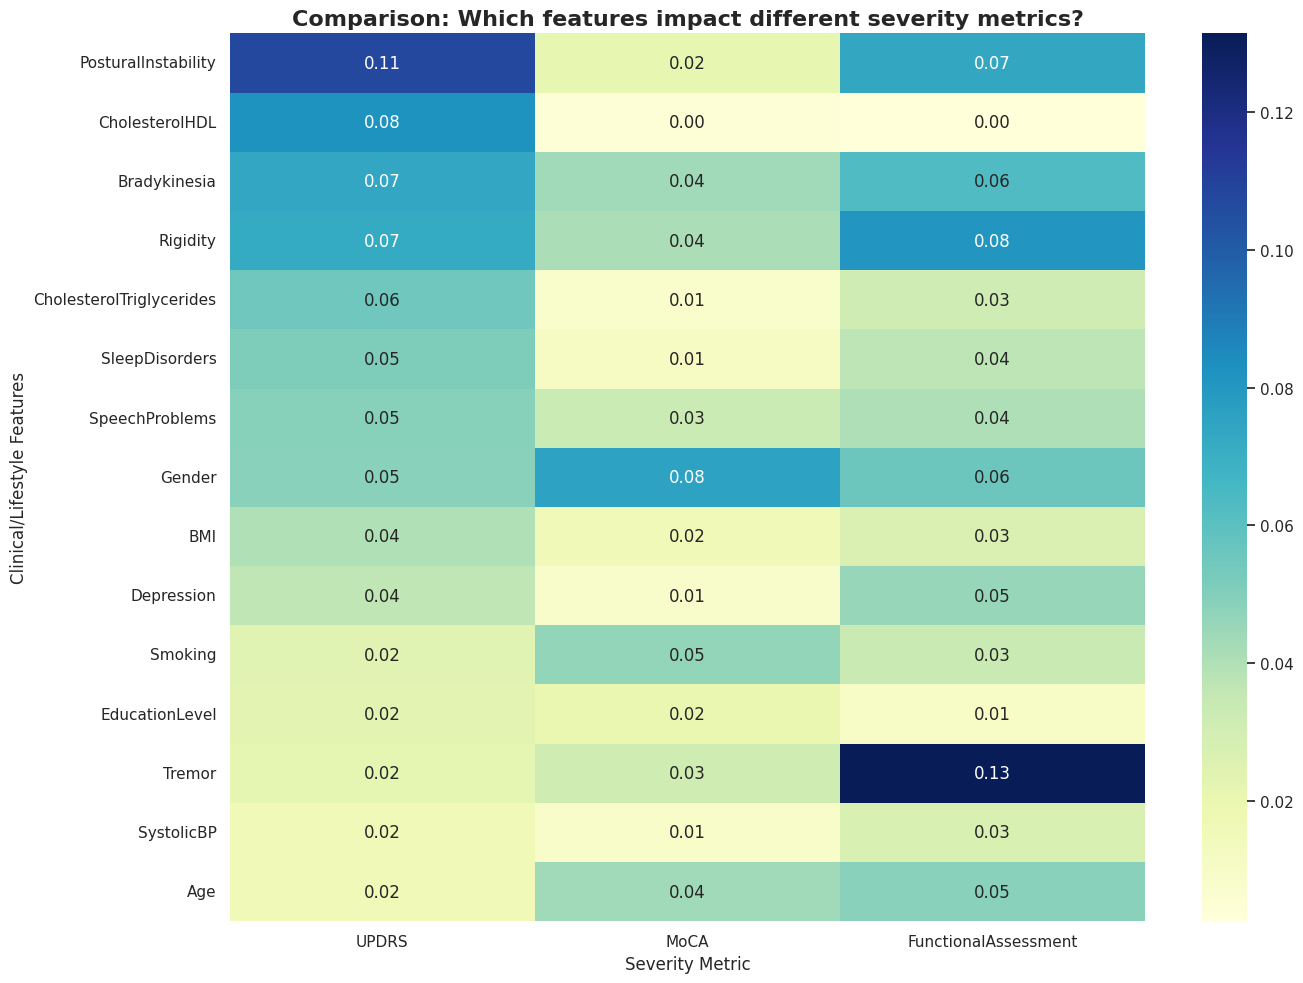

In [4]:
# --- Comparison of Different Severity Metrics ---

# 1. Filter only diagnosed patients
sick_df = df[df['Diagnosis'] == 1].copy()

# 2. Define our potential severity targets
severity_metrics = ['UPDRS', 'MoCA', 'FunctionalAssessment']

# 3. Features to check (excluding IDs and labels)
# We want to see how lifestyle/medical features affect each severity metric
exclude_cols = ['PatientID', 'Diagnosis', 'DoctorInCharge'] + severity_metrics
features = [col for col in sick_df.columns if col not in exclude_cols]

# 4. Calculate correlations for each metric
comparison_data = {}
for metric in severity_metrics:
    # We take the absolute correlation to see "strength" of impact
    corrs = sick_df[features + [metric]].corr()[metric].drop(metric).abs()
    comparison_data[metric] = corrs

# Create a summary DataFrame
comparison_df = pd.DataFrame(comparison_data)

# 5. Visualization: Side-by-Side Comparison
plt.figure(figsize=(14, 10))
sns.heatmap(comparison_df.sort_values(by='UPDRS', ascending=False).head(15), 
            annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Comparison: Which features impact different severity metrics?', fontsize=16, fontweight='bold')
plt.ylabel('Clinical/Lifestyle Features')
plt.xlabel('Severity Metric')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

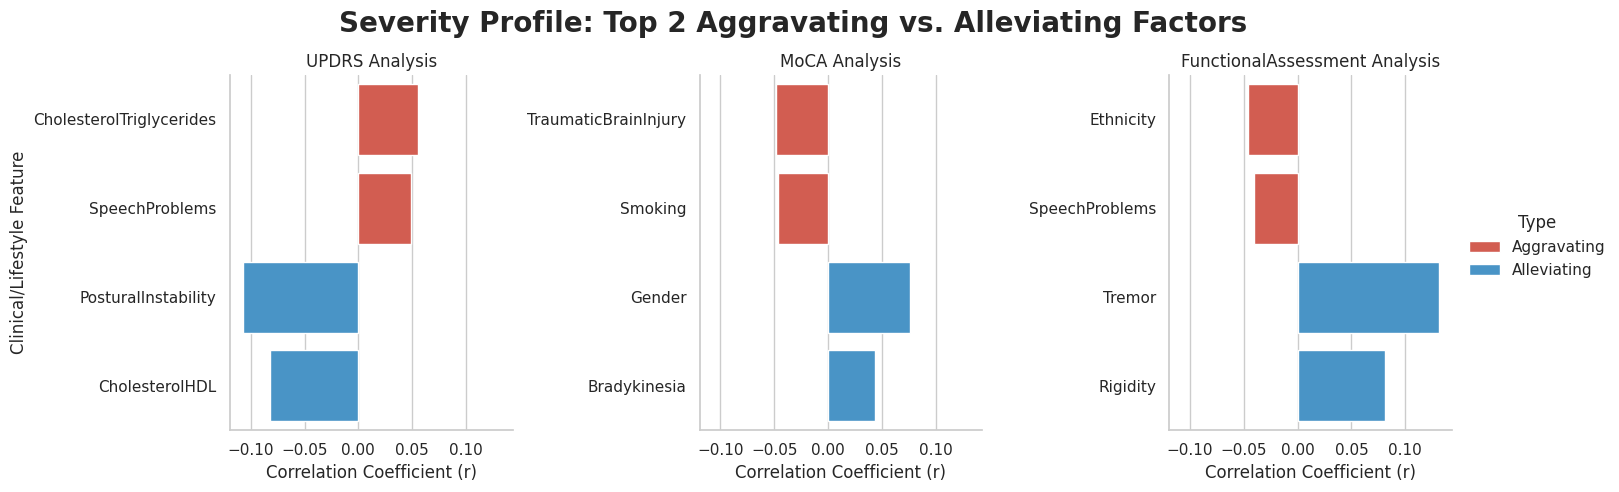

--- Detailed Severity Impact Summary ---


Metric,FunctionalAssessment,MoCA,UPDRS
Factor,,,
Bradykinesia,-,0.043327,-
CholesterolHDL,-,-,-0.082546
CholesterolTriglycerides,-,-,0.055042
Ethnicity,-0.046238,-,-
Gender,-,0.075781,-
PosturalInstability,-,-,-0.107494
Rigidity,0.08076,-,-
Smoking,-,-0.046669,-
SpeechProblems,-0.040564,-,0.049004


In [5]:
# 3. Define Severity Metrics
# UPDRS: High is BAD | MoCA: High is GOOD | Functional: High is GOOD
metrics = ['UPDRS', 'MoCA', 'FunctionalAssessment']

# 4. Feature Selection
# Exclude non-clinical columns and the metrics themselves
exclude = ['Diagnosis', 'DoctorInCharge'] + metrics
features = [col for col in sick_df.columns if col not in exclude]

# --- START MULTI-DIMENSIONAL ANALYSIS ---

summary_data = []

for metric in metrics:
    # Calculate correlations for this specific metric
    correlations = sick_df[features + [metric]].corr()[metric].drop(metric)
    
    # Logic: Identify Aggravating vs Alleviating based on metric type
    if metric == 'UPDRS':
        # Higher score = Worse condition
        aggravating = correlations.sort_values(ascending=False).head(2)
        alleviating = correlations.sort_values(ascending=True).head(2)
    else:
        # Higher score = Better condition (MoCA / Functional)
        # Therefore, negative correlation is aggravating
        aggravating = correlations.sort_values(ascending=True).head(2)
        alleviating = correlations.sort_values(ascending=False).head(2)
    
    # Collect results for visualization
    for factor, val in aggravating.items():
        summary_data.append({'Metric': metric, 'Factor': factor, 'Correlation': val, 'Type': 'Aggravating'})
    for factor, val in alleviating.items():
        summary_data.append({'Metric': metric, 'Factor': factor, 'Correlation': val, 'Type': 'Alleviating'})

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(summary_data)

# 5. Professional Visualization: Severity Profiles
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot showing how factors impact different metrics
g = sns.catplot(
    data=results_df, kind="bar",
    x="Correlation", y="Factor", hue="Type", col="Metric",
    palette={"Aggravating": "#e74c3c", "Alleviating": "#3498db"},
    sharey=False, height=5, aspect=1
)

# Formatting the Presentation
g.set_axis_labels("Correlation Coefficient (r)", "Clinical/Lifestyle Feature")
g.set_titles("{col_name} Analysis")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Severity Profile: Top 2 Aggravating vs. Alleviating Factors', fontsize=20, fontweight='bold')

plt.show()

# 6. Final Summary Table for the Presentation
print("--- Detailed Severity Impact Summary ---")
pivot_table = results_df.pivot(index='Factor', columns='Metric', values='Correlation')
display(pivot_table.fillna('-'))

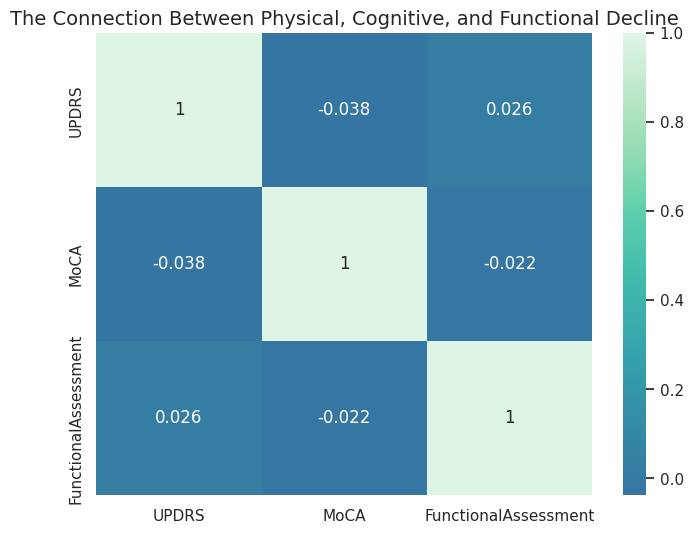

In [6]:
# --- Correlation Between Different Severity Dimensions ---
severity_cols = ['UPDRS', 'MoCA', 'FunctionalAssessment']
internal_corr = sick_df[severity_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(internal_corr, annot=True, cmap='mako', center=0)
plt.title('The Connection Between Physical, Cognitive, and Functional Decline', fontsize=14)
plt.show()

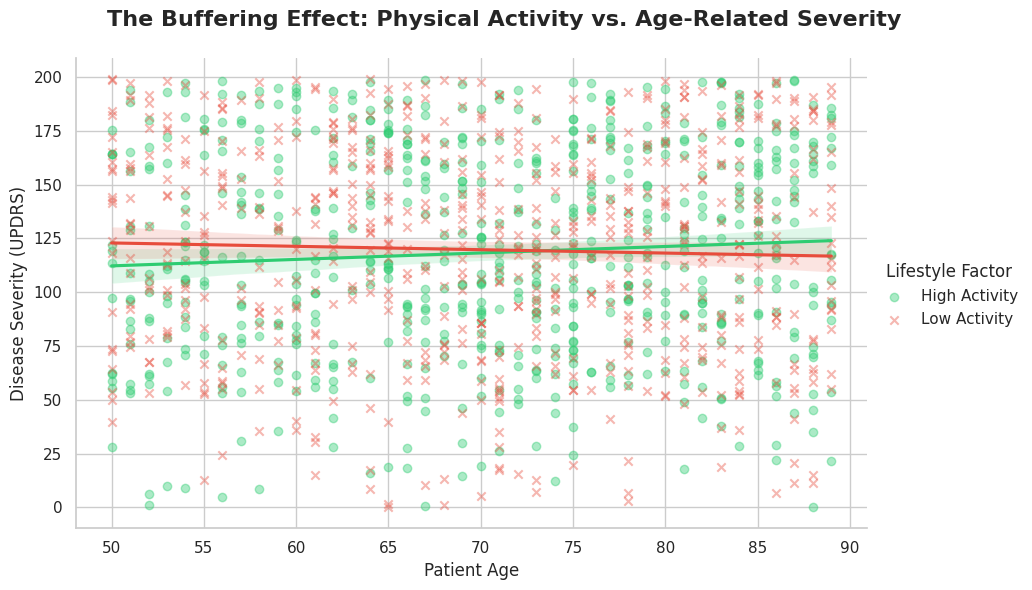

In [7]:
# --- Interaction: Does Physical Activity "Buffer" the effect of Age? ---


# 1. Create the ActivityLevel groups safely
# We use the median of PhysicalActivity to split the sick population into two groups
median_act = sick_df['PhysicalActivity'].median()

# Creating a new column using .loc to avoid SettingWithCopyWarning
sick_df.loc[sick_df['PhysicalActivity'] > median_act, 'ActivityLevel'] = 'High Activity'
sick_df.loc[sick_df['PhysicalActivity'] <= median_act, 'ActivityLevel'] = 'Low Activity'

# 2. Visualization: Using lmplot to show two separate regression lines
# Note: lmplot manages its own figure size with 'height' and 'aspect'
g = sns.lmplot(
    data=sick_df, 
    x='Age', 
    y='UPDRS', 
    hue='ActivityLevel', 
    palette={'High Activity': '#2ecc71', 'Low Activity': '#e74c3c'}, # Green vs Red
    markers=["o", "x"],
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.4} # Making dots semi-transparent to see density
)

# 3. Professional English labeling for the presentation
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The Buffering Effect: Physical Activity vs. Age-Related Severity', fontsize=16, fontweight='bold')
g.set_axis_labels("Patient Age", "Disease Severity (UPDRS)")

# Adding a clear legend title
g._legend.set_title("Lifestyle Factor")

plt.show()

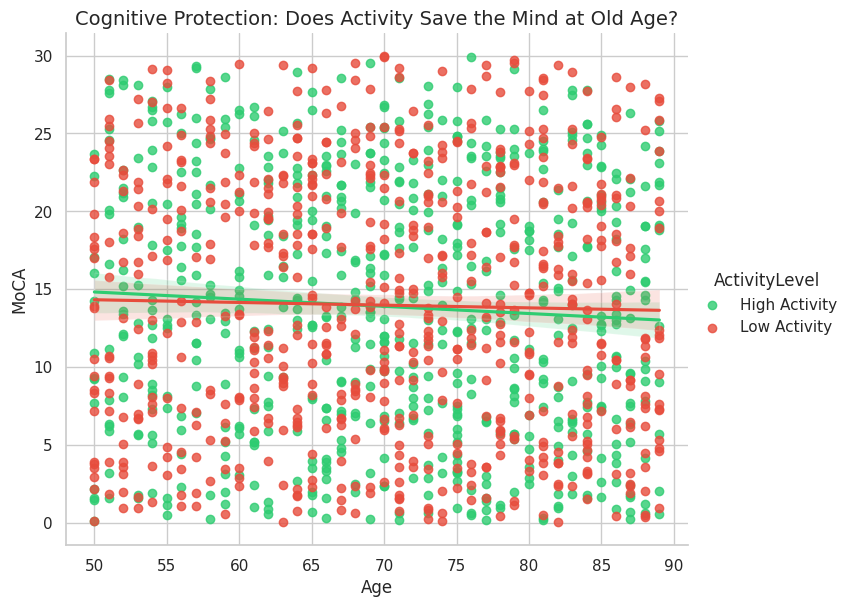

In [10]:
# Check the same interaction but for Cognitive Health (MoCA)
g = sns.lmplot(
    data=sick_df, x='Age', y='MoCA', hue='ActivityLevel', 
    palette={'High Activity': '#2ecc71', 'Low Activity': '#e74c3c'},
    height=6, aspect=1.2
)
plt.title('Cognitive Protection: Does Activity Save the Mind at Old Age?', fontsize=14)
plt.show()

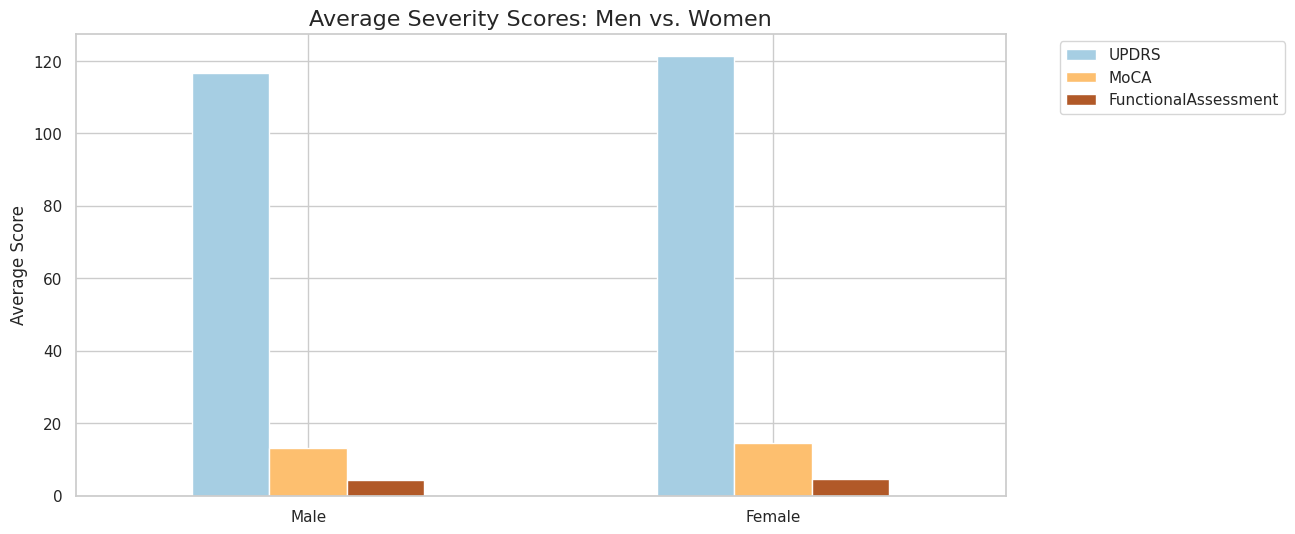

In [8]:
# Compare average severity metrics between Men and Women
gender_summary = sick_df.groupby('Gender')[['UPDRS', 'MoCA', 'FunctionalAssessment']].mean()
gender_summary.index = ['Male', 'Female'] # Assuming 0=Male, 1=Female (check your data)

gender_summary.plot(kind='bar', figsize=(12, 6), colormap='Paired')
plt.title('Average Severity Scores: Men vs. Women', fontsize=16)
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_361306/1824040236.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sick_df, x='AgeGroup', y='UPDRS', ax=axes[0], palette='Reds')
/tmp/ipykernel_361306/1824040236.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sick_df, x='AgeGroup', y='MoCA', ax=axes[1], palette='Blues')
/tmp/ipykernel_361306/1824040236.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sick_df, x='AgeGroup', y='FunctionalAssessment', ax=axes[2], palette='Greens')


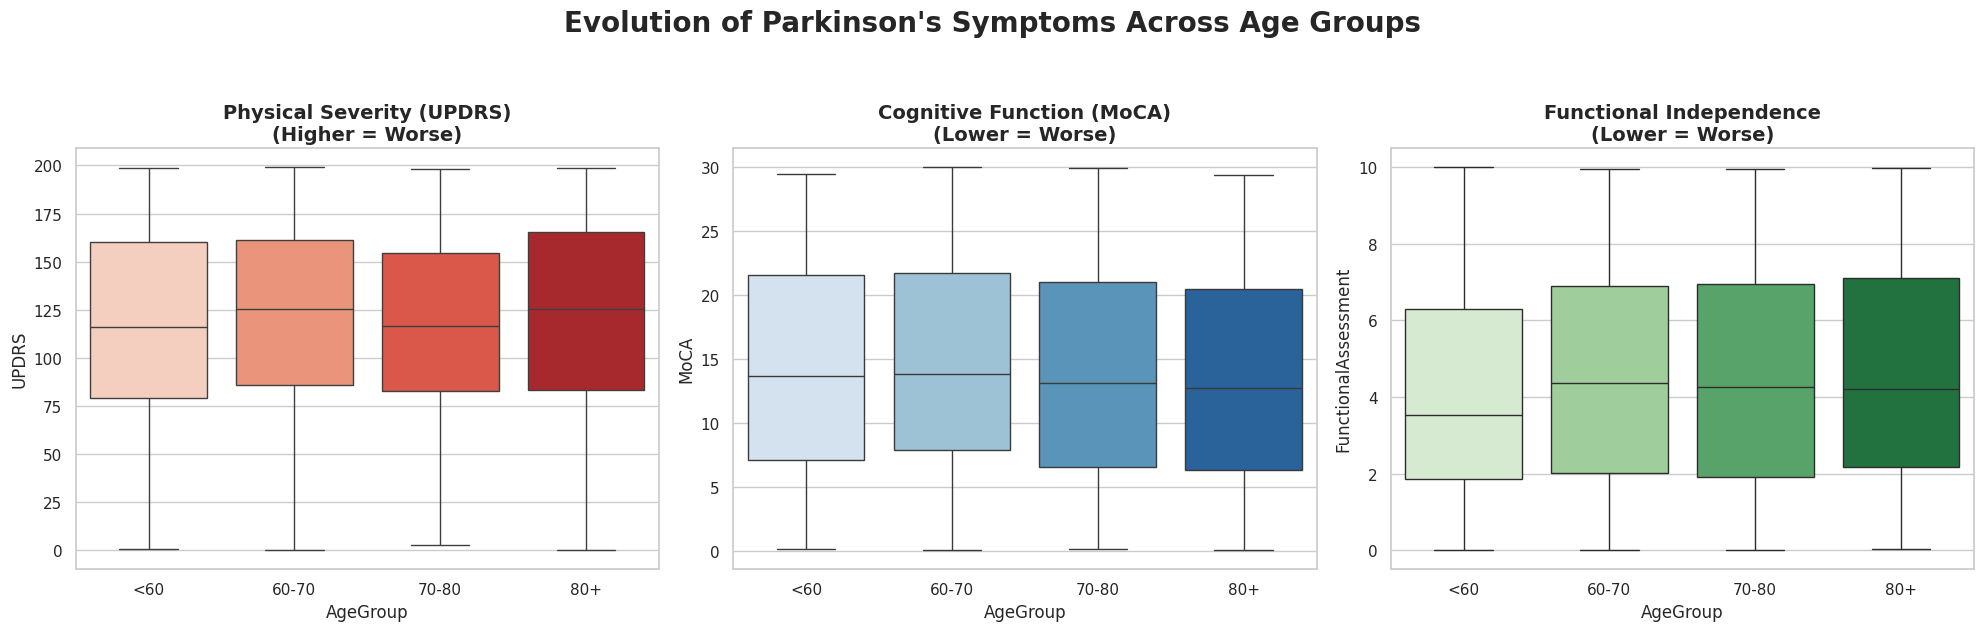

In [9]:
# --- Multi-Metric Age Analysis ---

# 1. Ensure Age Groups are defined
# We use pd.cut to create logical life-stages for Parkinson's analysis
sick_df['AgeGroup'] = pd.cut(sick_df['Age'], bins=[0, 60, 70, 80, 100], 
                             labels=['<60', '60-70', '70-80', '80+'])

# 2. Setup the subplot figure (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="whitegrid")

# 3. Plot 1: Physical Severity (UPDRS)
# Reminder: Higher is worse
sns.boxplot(data=sick_df, x='AgeGroup', y='UPDRS', ax=axes[0], palette='Reds')
axes[0].set_title('Physical Severity (UPDRS)\n(Higher = Worse)', fontsize=14, fontweight='bold')

# 4. Plot 2: Cognitive Function (MoCA)
# Reminder: Lower is worse
sns.boxplot(data=sick_df, x='AgeGroup', y='MoCA', ax=axes[1], palette='Blues')
axes[1].set_title('Cognitive Function (MoCA)\n(Lower = Worse)', fontsize=14, fontweight='bold')

# 5. Plot 3: Functional Assessment
# Reminder: Lower is worse
sns.boxplot(data=sick_df, x='AgeGroup', y='FunctionalAssessment', ax=axes[2], palette='Greens')
axes[2].set_title('Functional Independence\n(Lower = Worse)', fontsize=14, fontweight='bold')

# 6. Global Formatting
plt.suptitle('Evolution of Parkinson\'s Symptoms Across Age Groups', fontsize=20, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()